In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/content/drive/MyDrive/stock_data.csv')
data

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


Overview of the Dataset

Checking the shape of the dataset


In [4]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 340 rows and 15 columns.


Displaying few rows of the dataset


In [5]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


Checking the data types of the columns for the dataset

In [6]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Creating a copy of original data

In [7]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

Checking for duplicates and missing values

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


Statistical summary of the dataset

Let's check the statistical summary of the data.

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


Exploratory Data Analysis

Univariate analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Current price

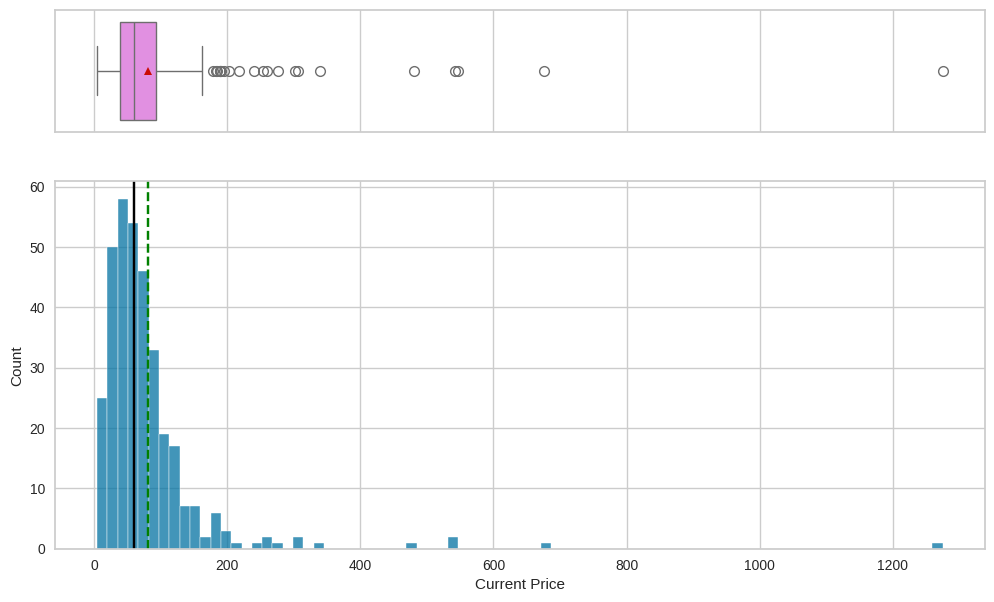

In [13]:
histogram_boxplot(df, 'Current Price')

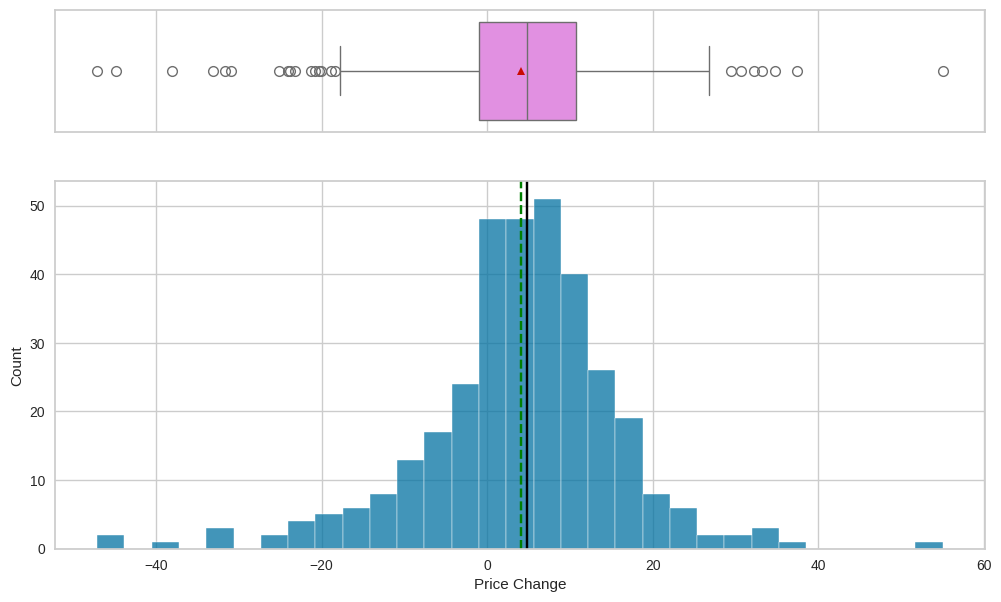

In [14]:
histogram_boxplot(df,'Price Change')

Volatility

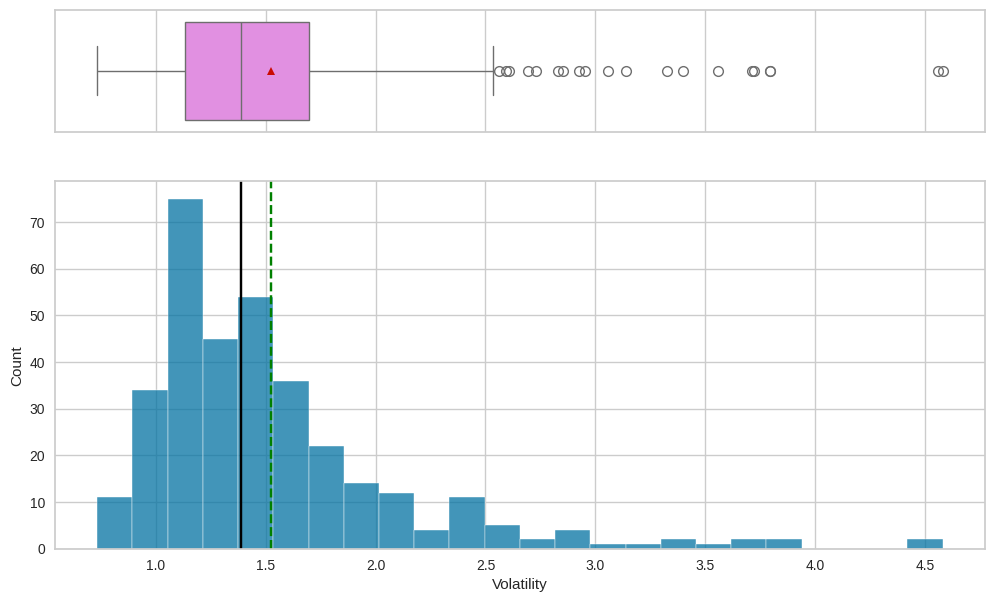

In [15]:
histogram_boxplot(df,'Volatility')

ROE

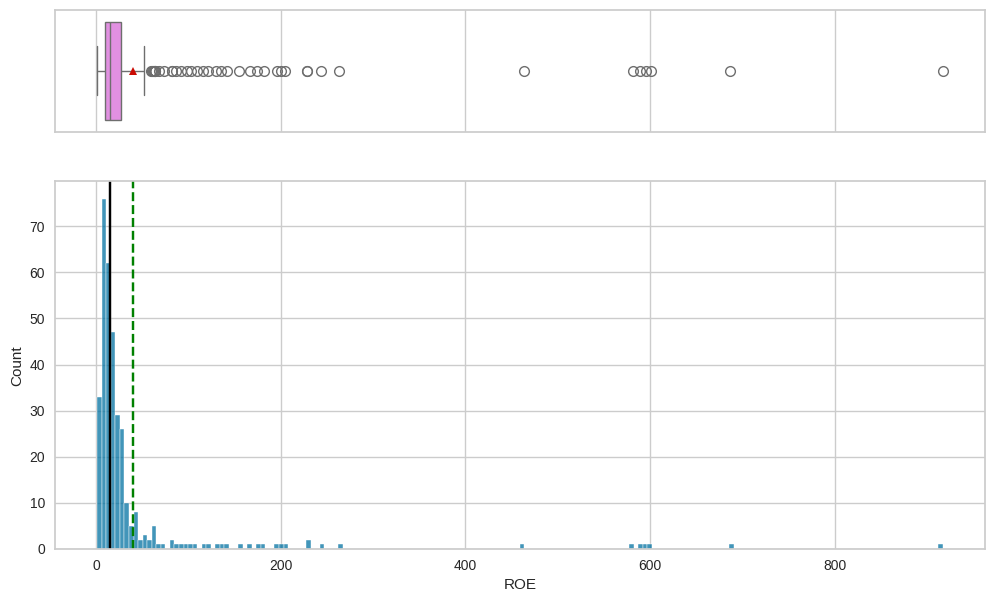

In [16]:
histogram_boxplot(df,'ROE')

Cash Ratio

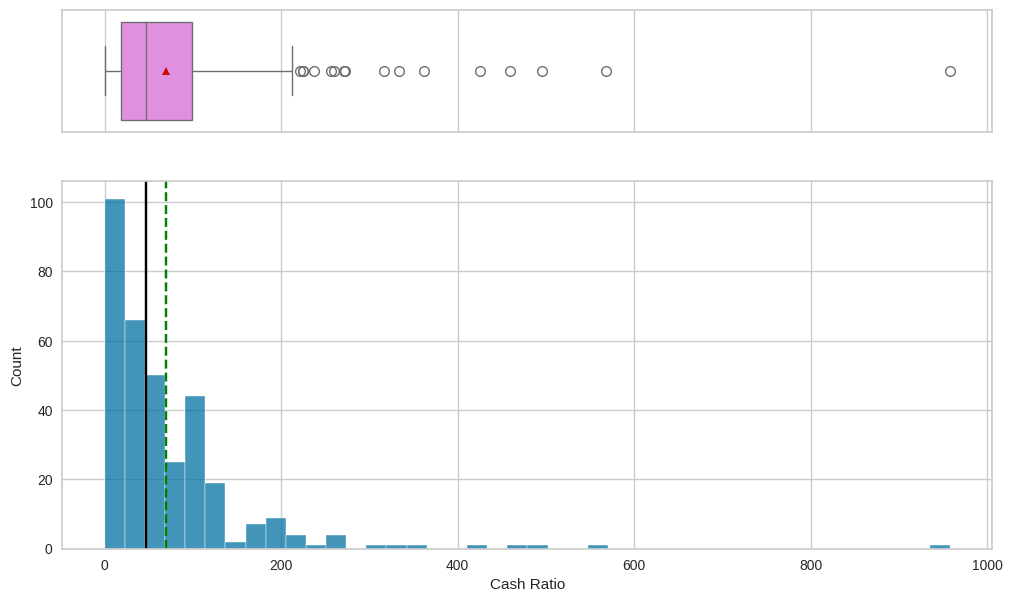

In [17]:
histogram_boxplot(df,'Cash Ratio')

Net Cash FLow

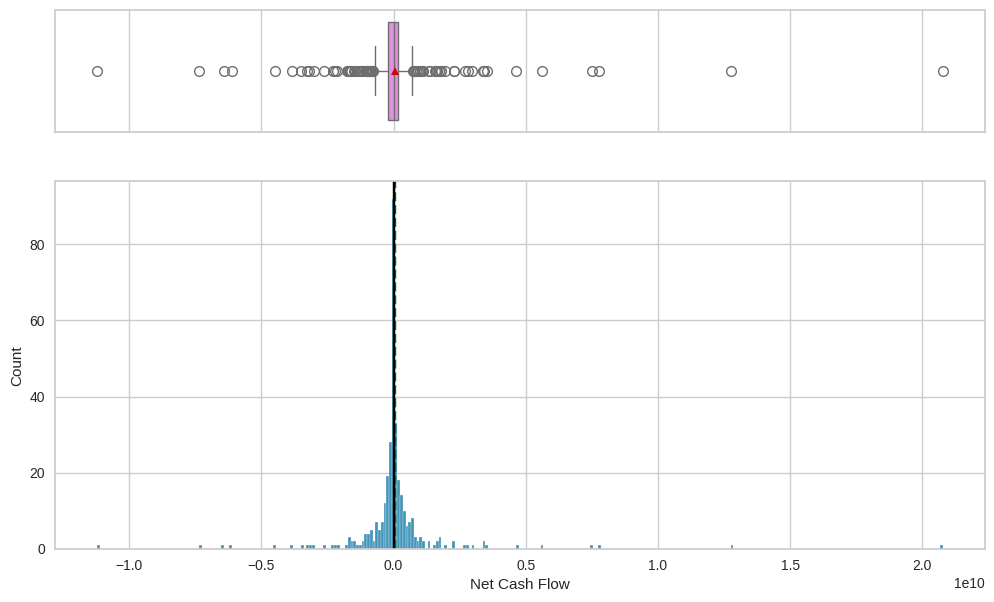

In [18]:
histogram_boxplot(df,'Net Cash Flow')

Net Come

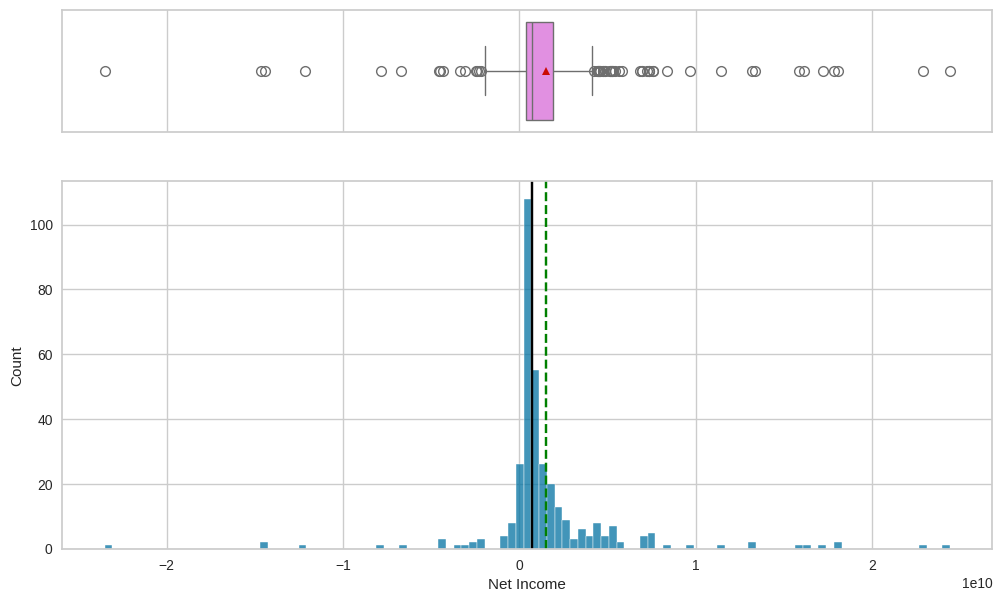

In [19]:
histogram_boxplot(df,'Net Income')

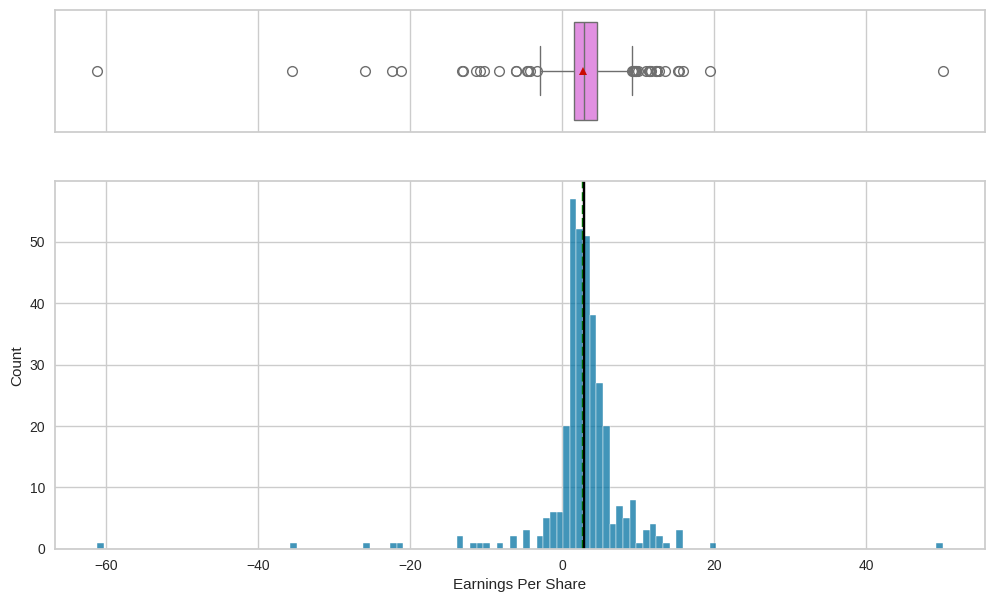

In [20]:
histogram_boxplot(df,'Earnings Per Share')

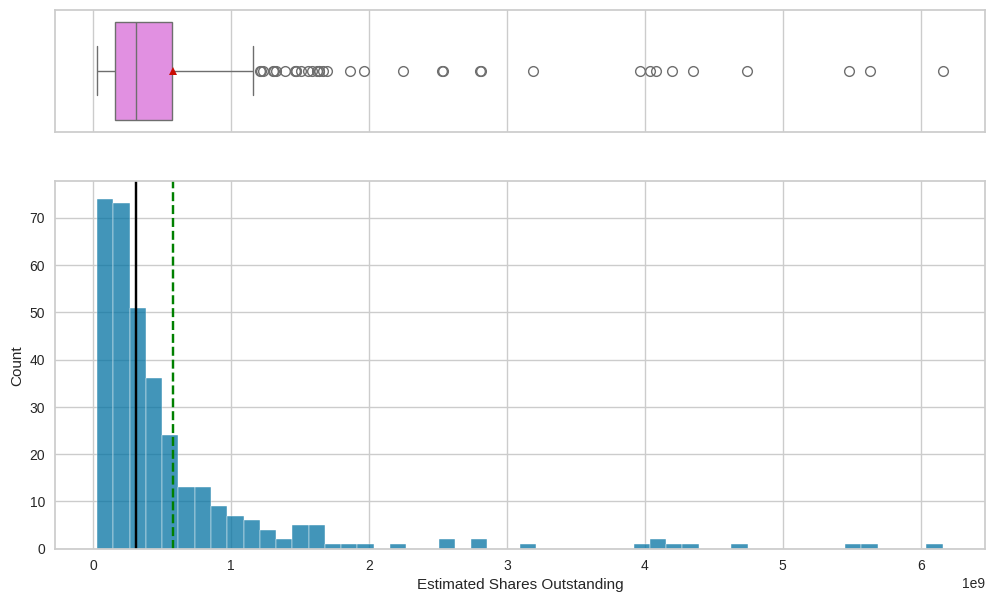

In [21]:
histogram_boxplot(df,'Estimated Shares Outstanding')

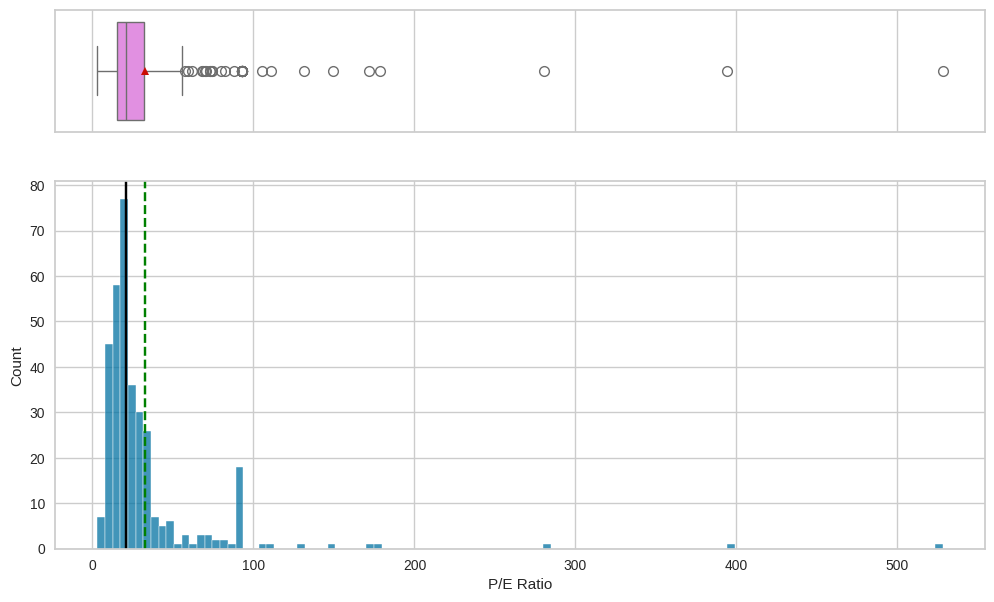

In [22]:
histogram_boxplot(df,'P/E Ratio')

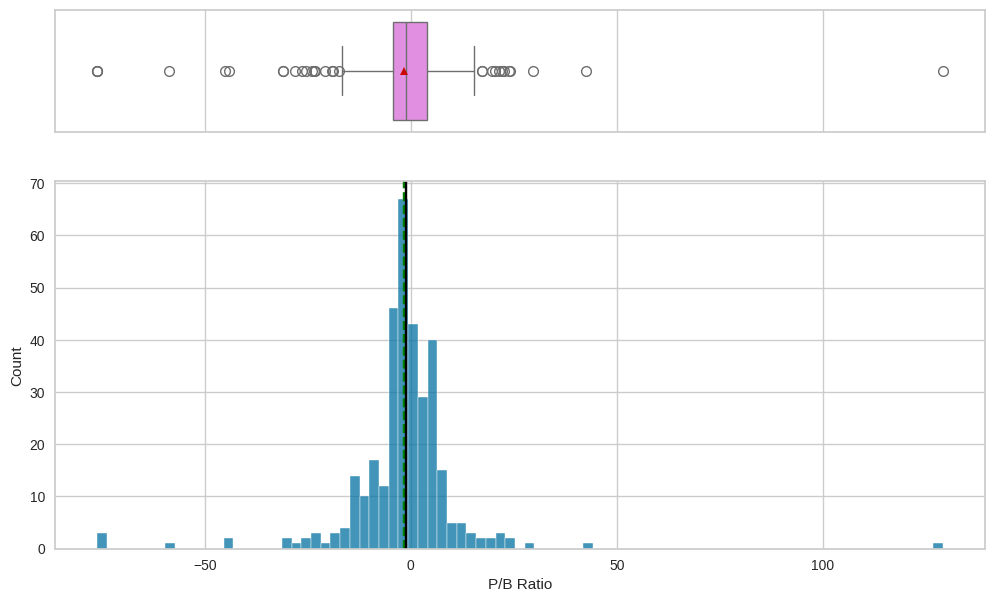

In [23]:
histogram_boxplot(df,'P/B Ratio')

In [24]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

GICS SECTOR

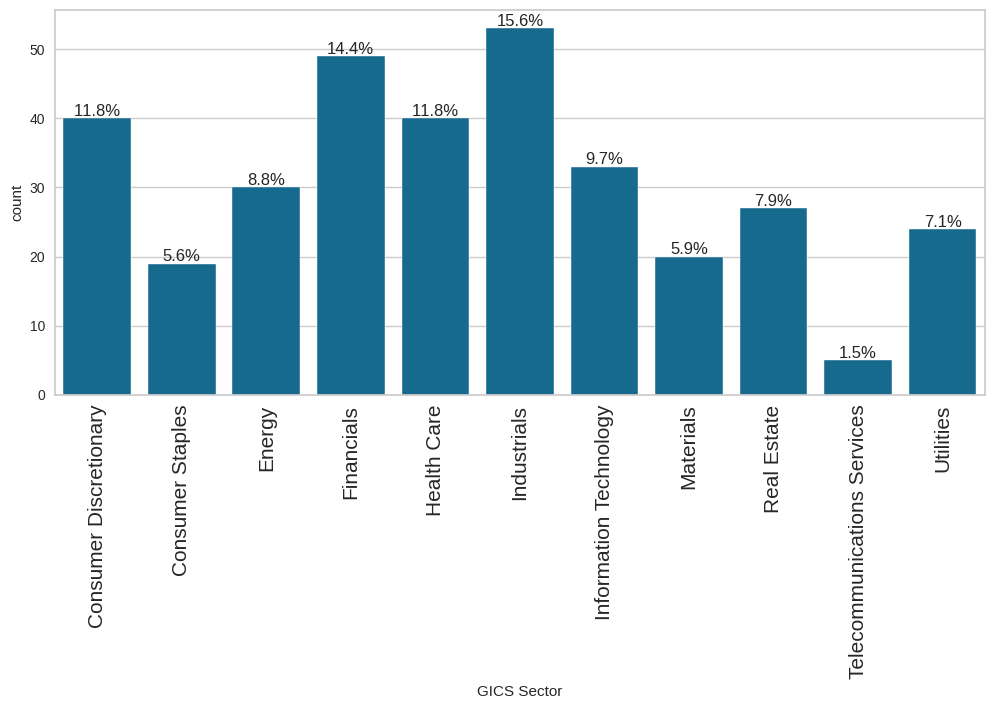

In [25]:
labeled_barplot(df, 'GICS Sector', perc=True)

GIC SUB INDUSTRY

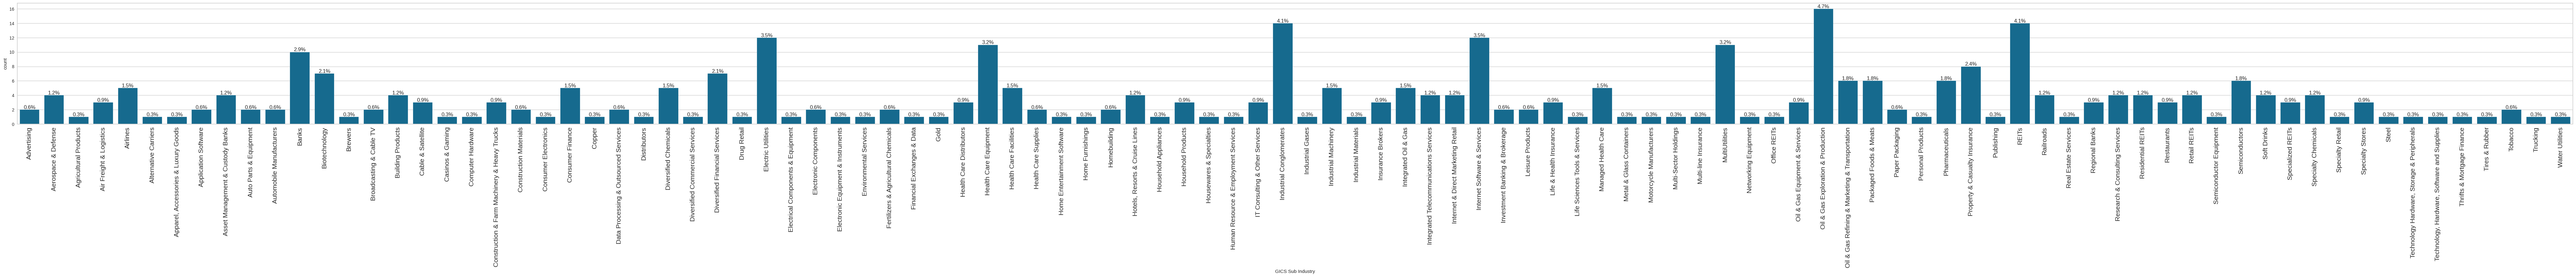

In [26]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

Bivariate Analysis

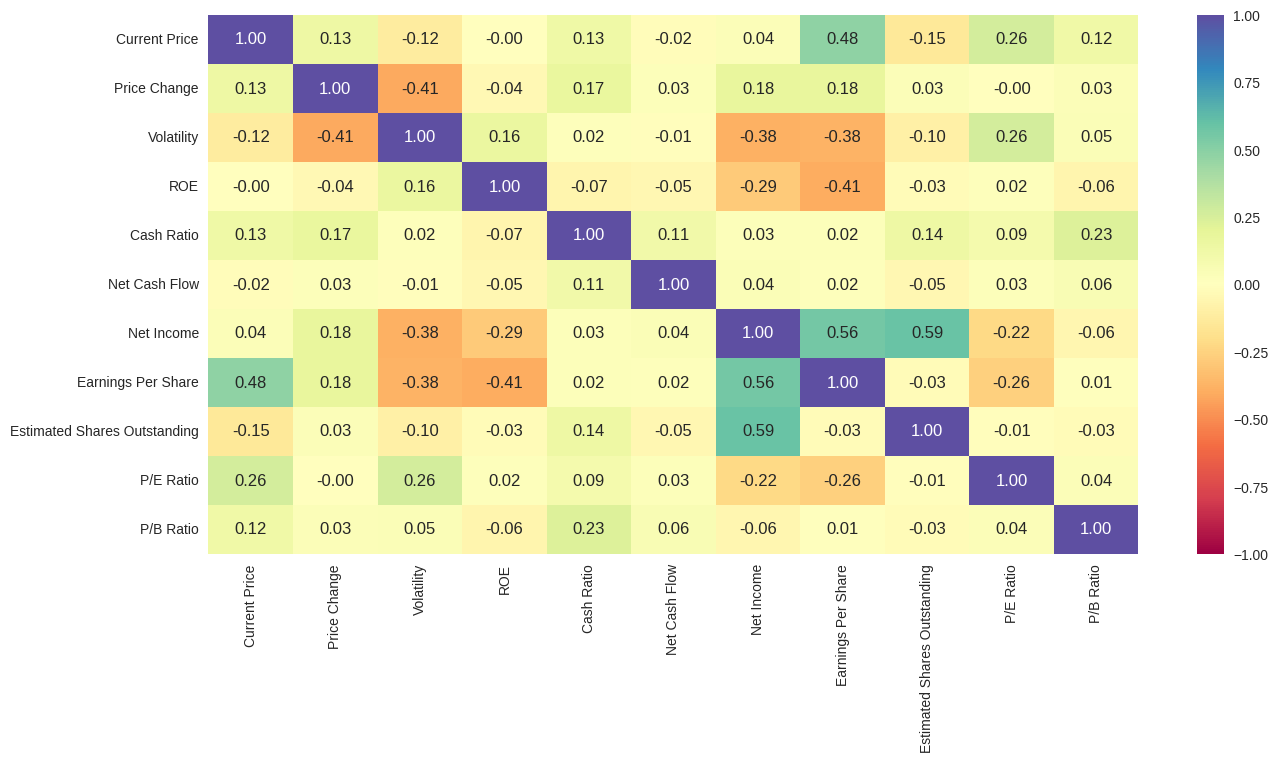

In [28]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(), # Select only numerical columns for correlation calculation
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral"
)
plt.show()

Let's check the stocks of which economic sector have seen the maximum price increase on average.

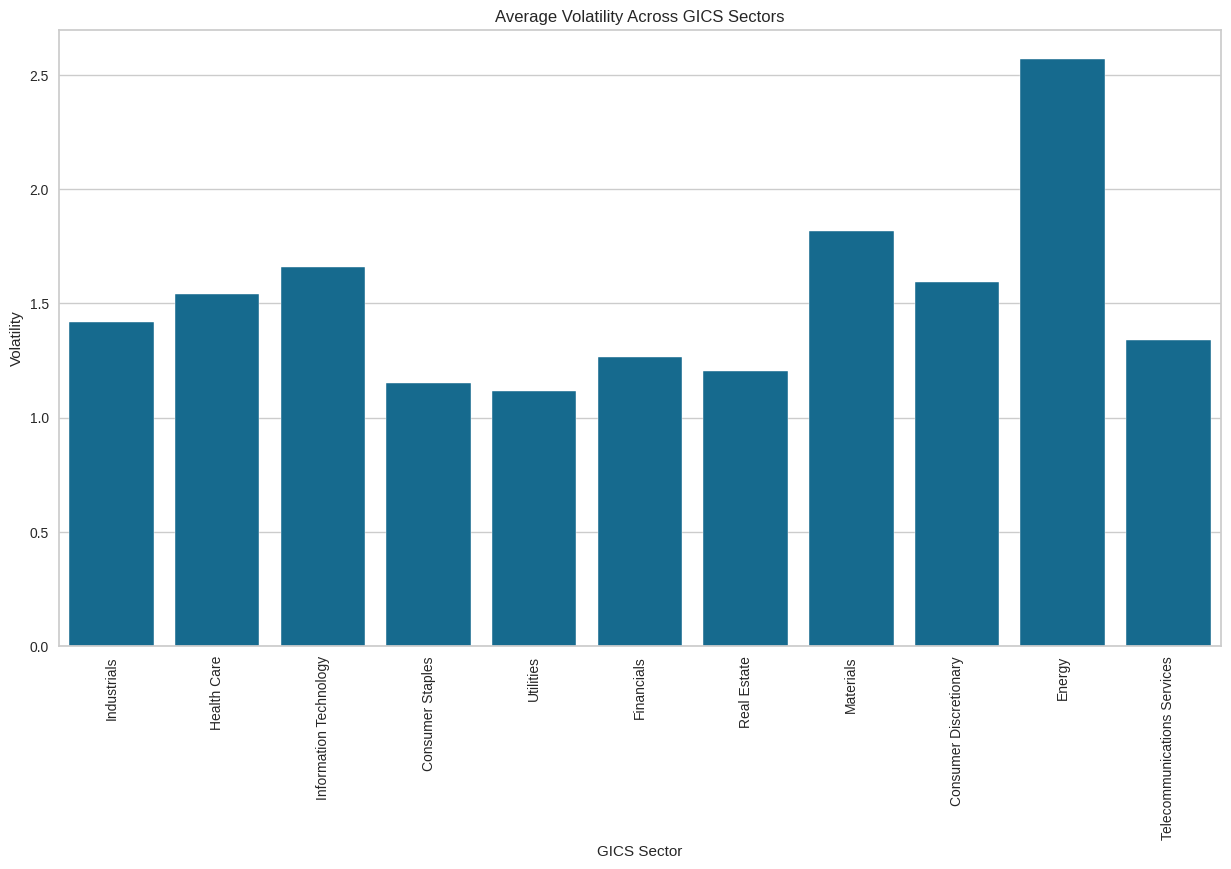

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.title('Average Volatility Across GICS Sectors')
plt.xlabel('GICS Sector')
plt.ylabel('Volatility')
plt.show()

Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.

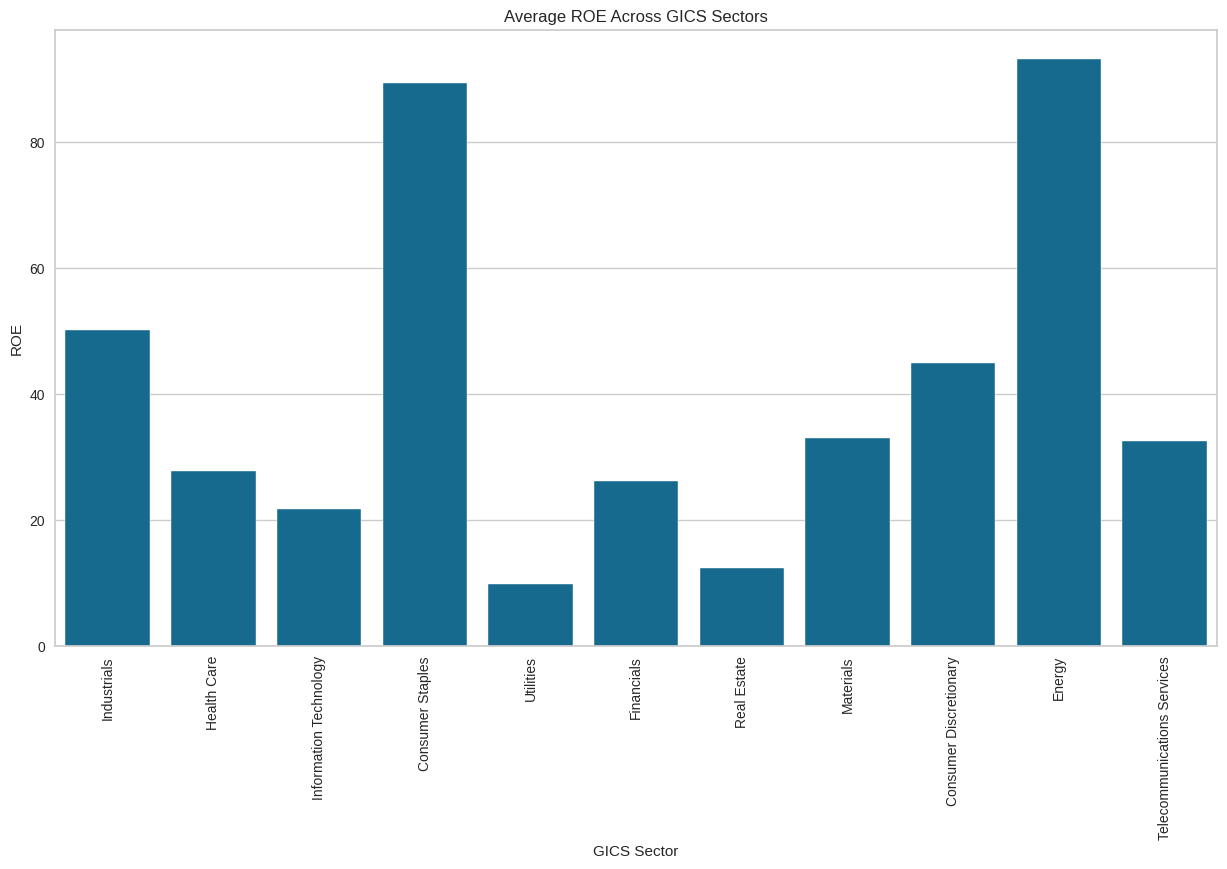

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='ROE', ci=False)
plt.xticks(rotation=90)
plt.title('Average ROE Across GICS Sectors')
plt.xlabel('GICS Sector')
plt.ylabel('ROE')
plt.show()

P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.

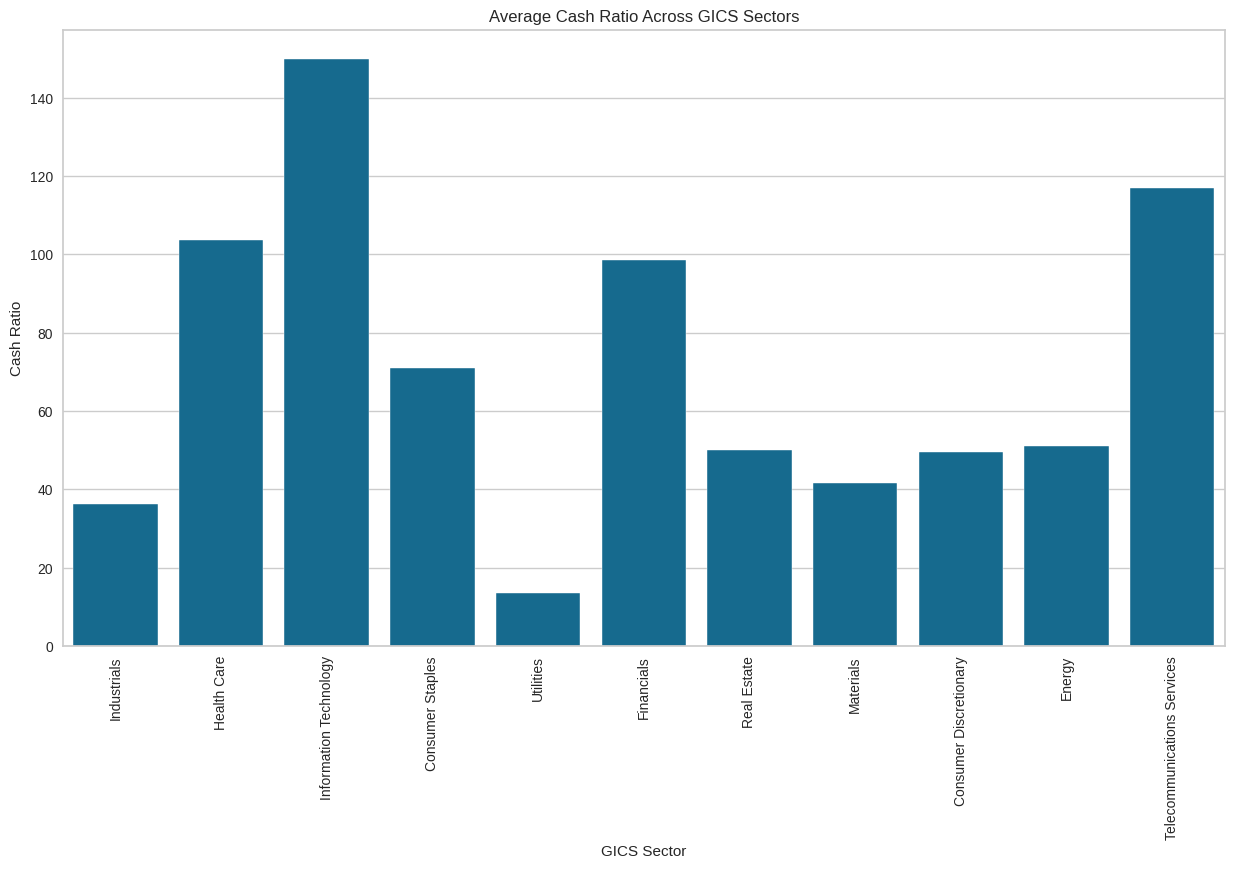

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.title('Average Cash Ratio Across GICS Sectors')
plt.xlabel('GICS Sector')
plt.ylabel('Cash Ratio')
plt.show()

Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.

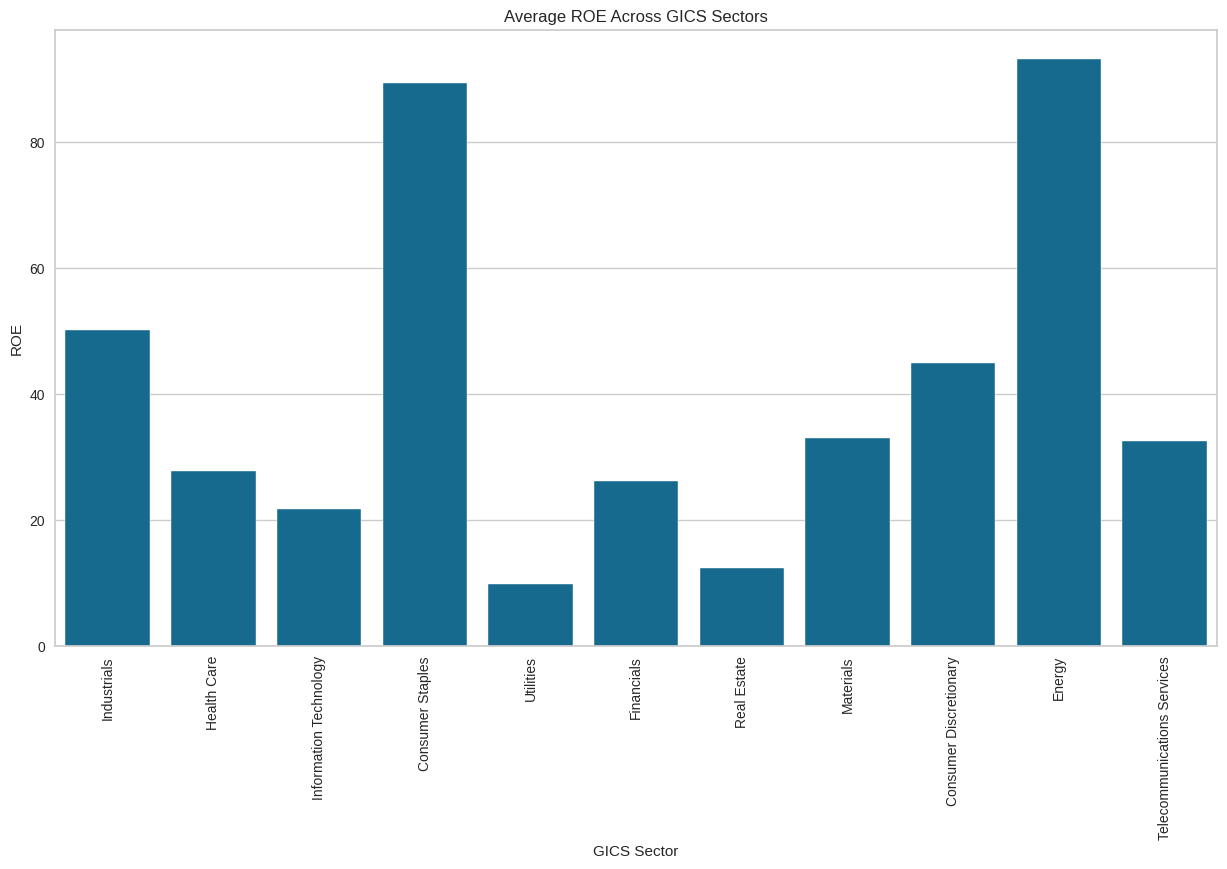

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='ROE', ci=False)
plt.xticks(rotation=90)
plt.title('Average ROE Across GICS Sectors')
plt.xlabel('GICS Sector')
plt.ylabel('ROE')
plt.show()

Data Preprocessing

Outlier Check

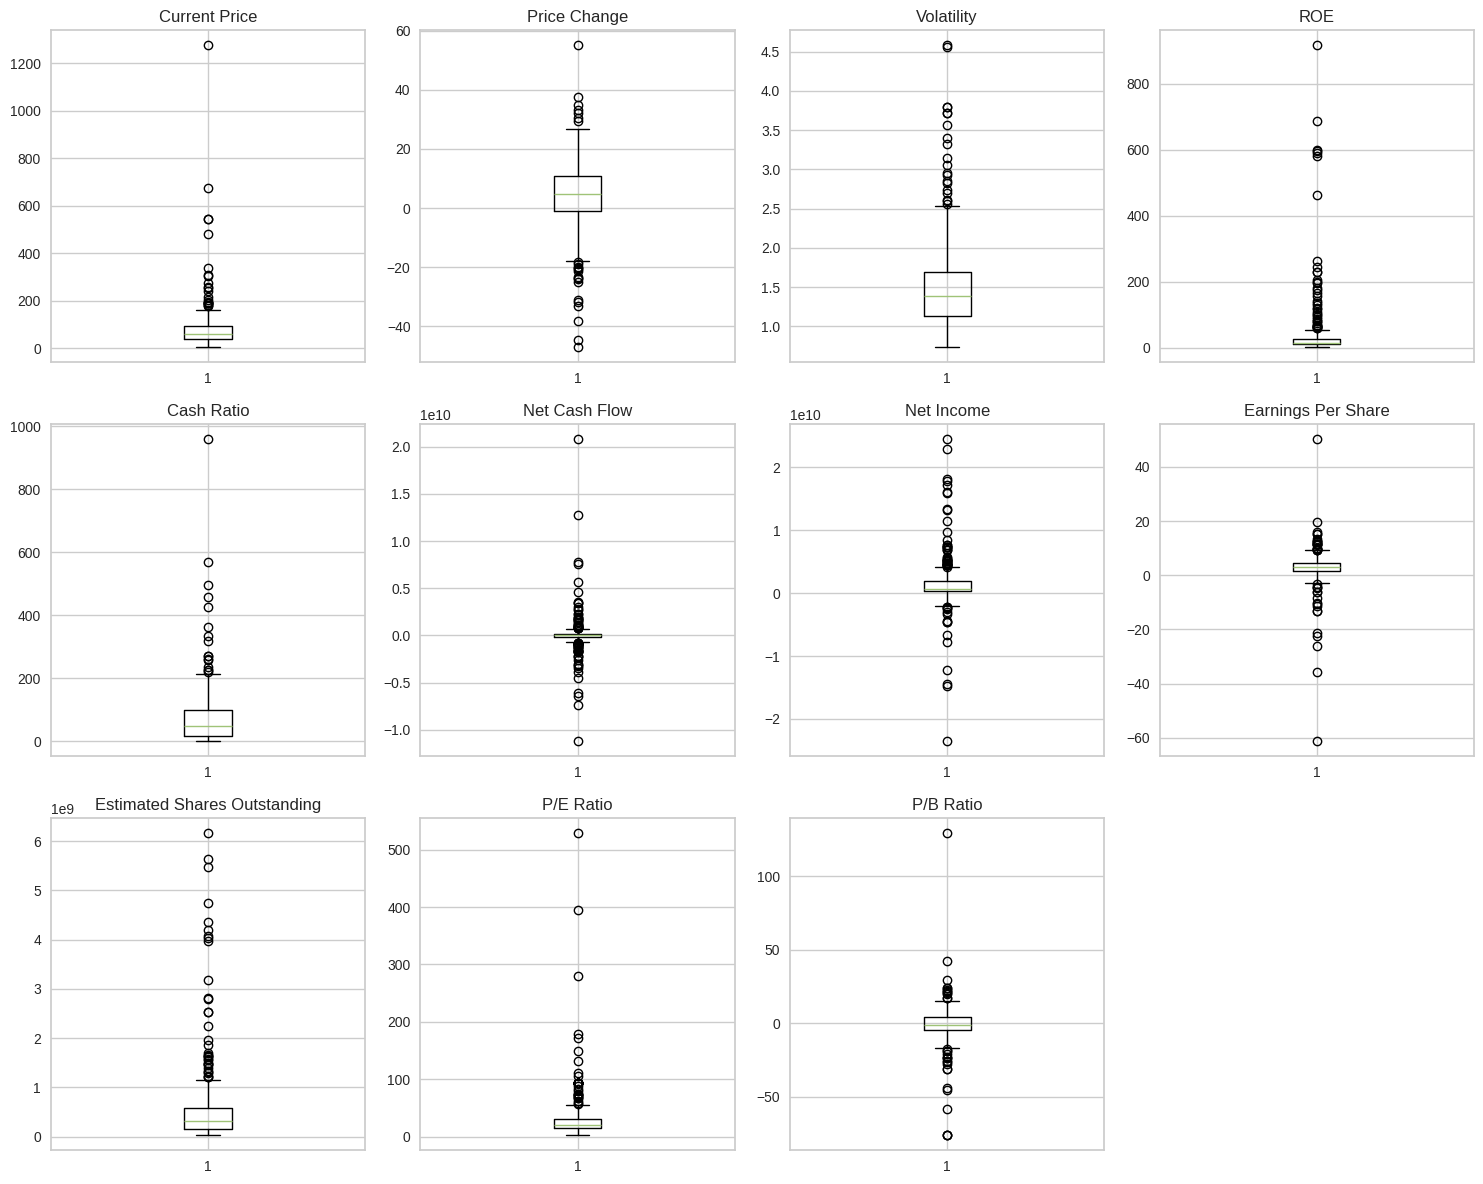

In [33]:
#Let's plot the boxplots of all numerical columns to check for outliers.
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.show()

Scaling

.Let's scale the data before we proceed with clustering.

In [34]:
scaler = StandardScaler()
subset = df.select_dtypes(include=np.number)
subset_scaled = scaler.fit_transform(subset)

In [35]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

K-means Clustering

Checking Elbow Plot

In [36]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411
Number of Clusters: 9 	Average Distortion: 1.956222103389025
Number of Clusters: 10 	Average Distortion: 1.9360473996664198
Number of Clusters: 11 	Average Distortion: 1.8615942883461607
Number of Clusters: 12 	Average Distortion: 1.8219574388532505
Number of Clusters: 13 	Average Distortion: 1.7936924742607907
Number of Clusters: 14 	Average Distortion: 1.7567842179093438


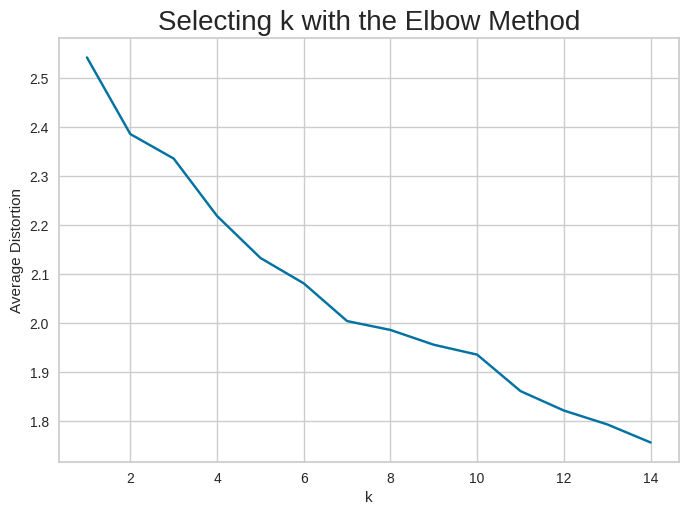

In [37]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

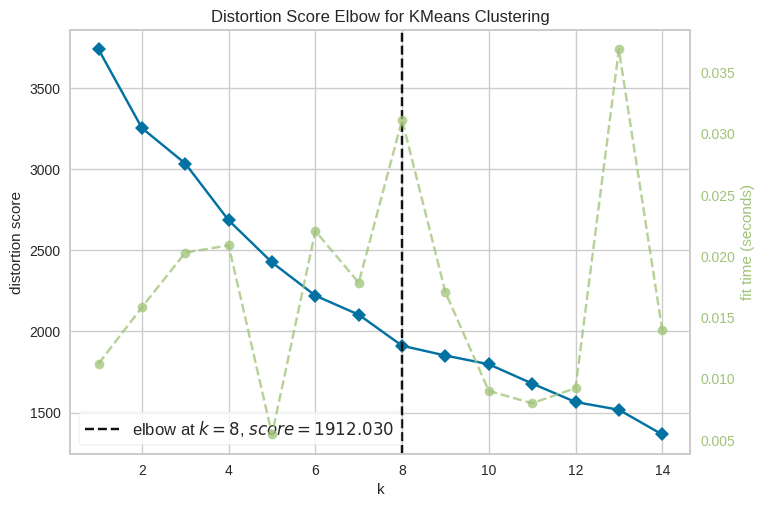

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.45335782729503565)
For n_clusters = 3, the silhouette score is 0.40374060030338865)
For n_clusters = 4, the silhouette score is 0.4246430808437099)
For n_clusters = 5, the silhouette score is 0.4381539778147092)
For n_clusters = 6, the silhouette score is 0.40869599703024256)
For n_clusters = 7, the silhouette score is 0.1207450219233897)
For n_clusters = 8, the silhouette score is 0.3693991650696542)
For n_clusters = 9, the silhouette score is 0.35185096182499204)
For n_clusters = 10, the silhouette score is 0.32950073703610283)
For n_clusters = 11, the silhouette score is 0.1486586842527321)
For n_clusters = 12, the silhouette score is 0.15784241071085106)
For n_clusters = 13, the silhouette score is 0.15646997458716602)
For n_clusters = 14, the silhouette score is 0.16253506827999134)


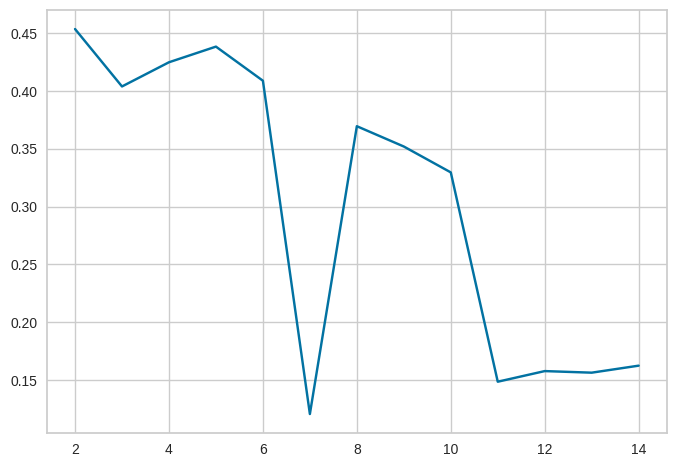

In [39]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

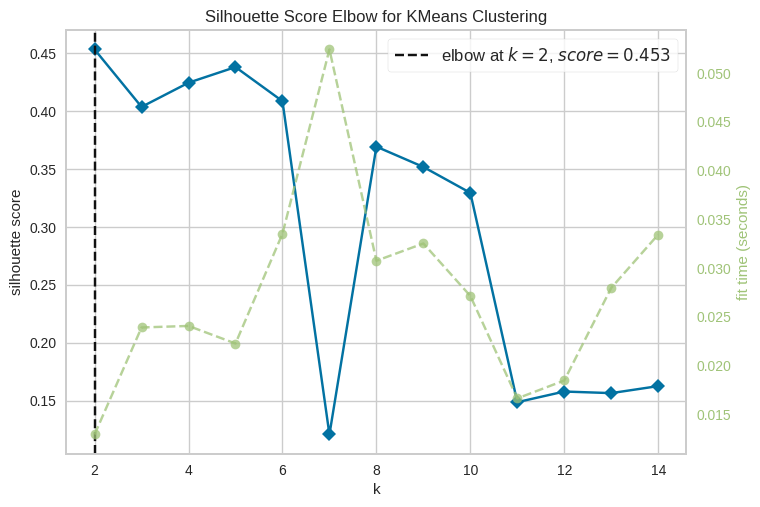

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [40]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Creating Final Model

In [41]:
# final K-means model
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=5, random_state=1)

In [59]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [60]:
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [61]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Energy                         21
             Health Care                     1
             Industrials                     1
             Information Technology          4
             Materials                       2
2            Energy                          2
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
4            Consumer Discretionary          5
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     9
             Information Technology          5
             Real Estate                     1
             Telecommunications Services     1
Name: Security, dtype: int64

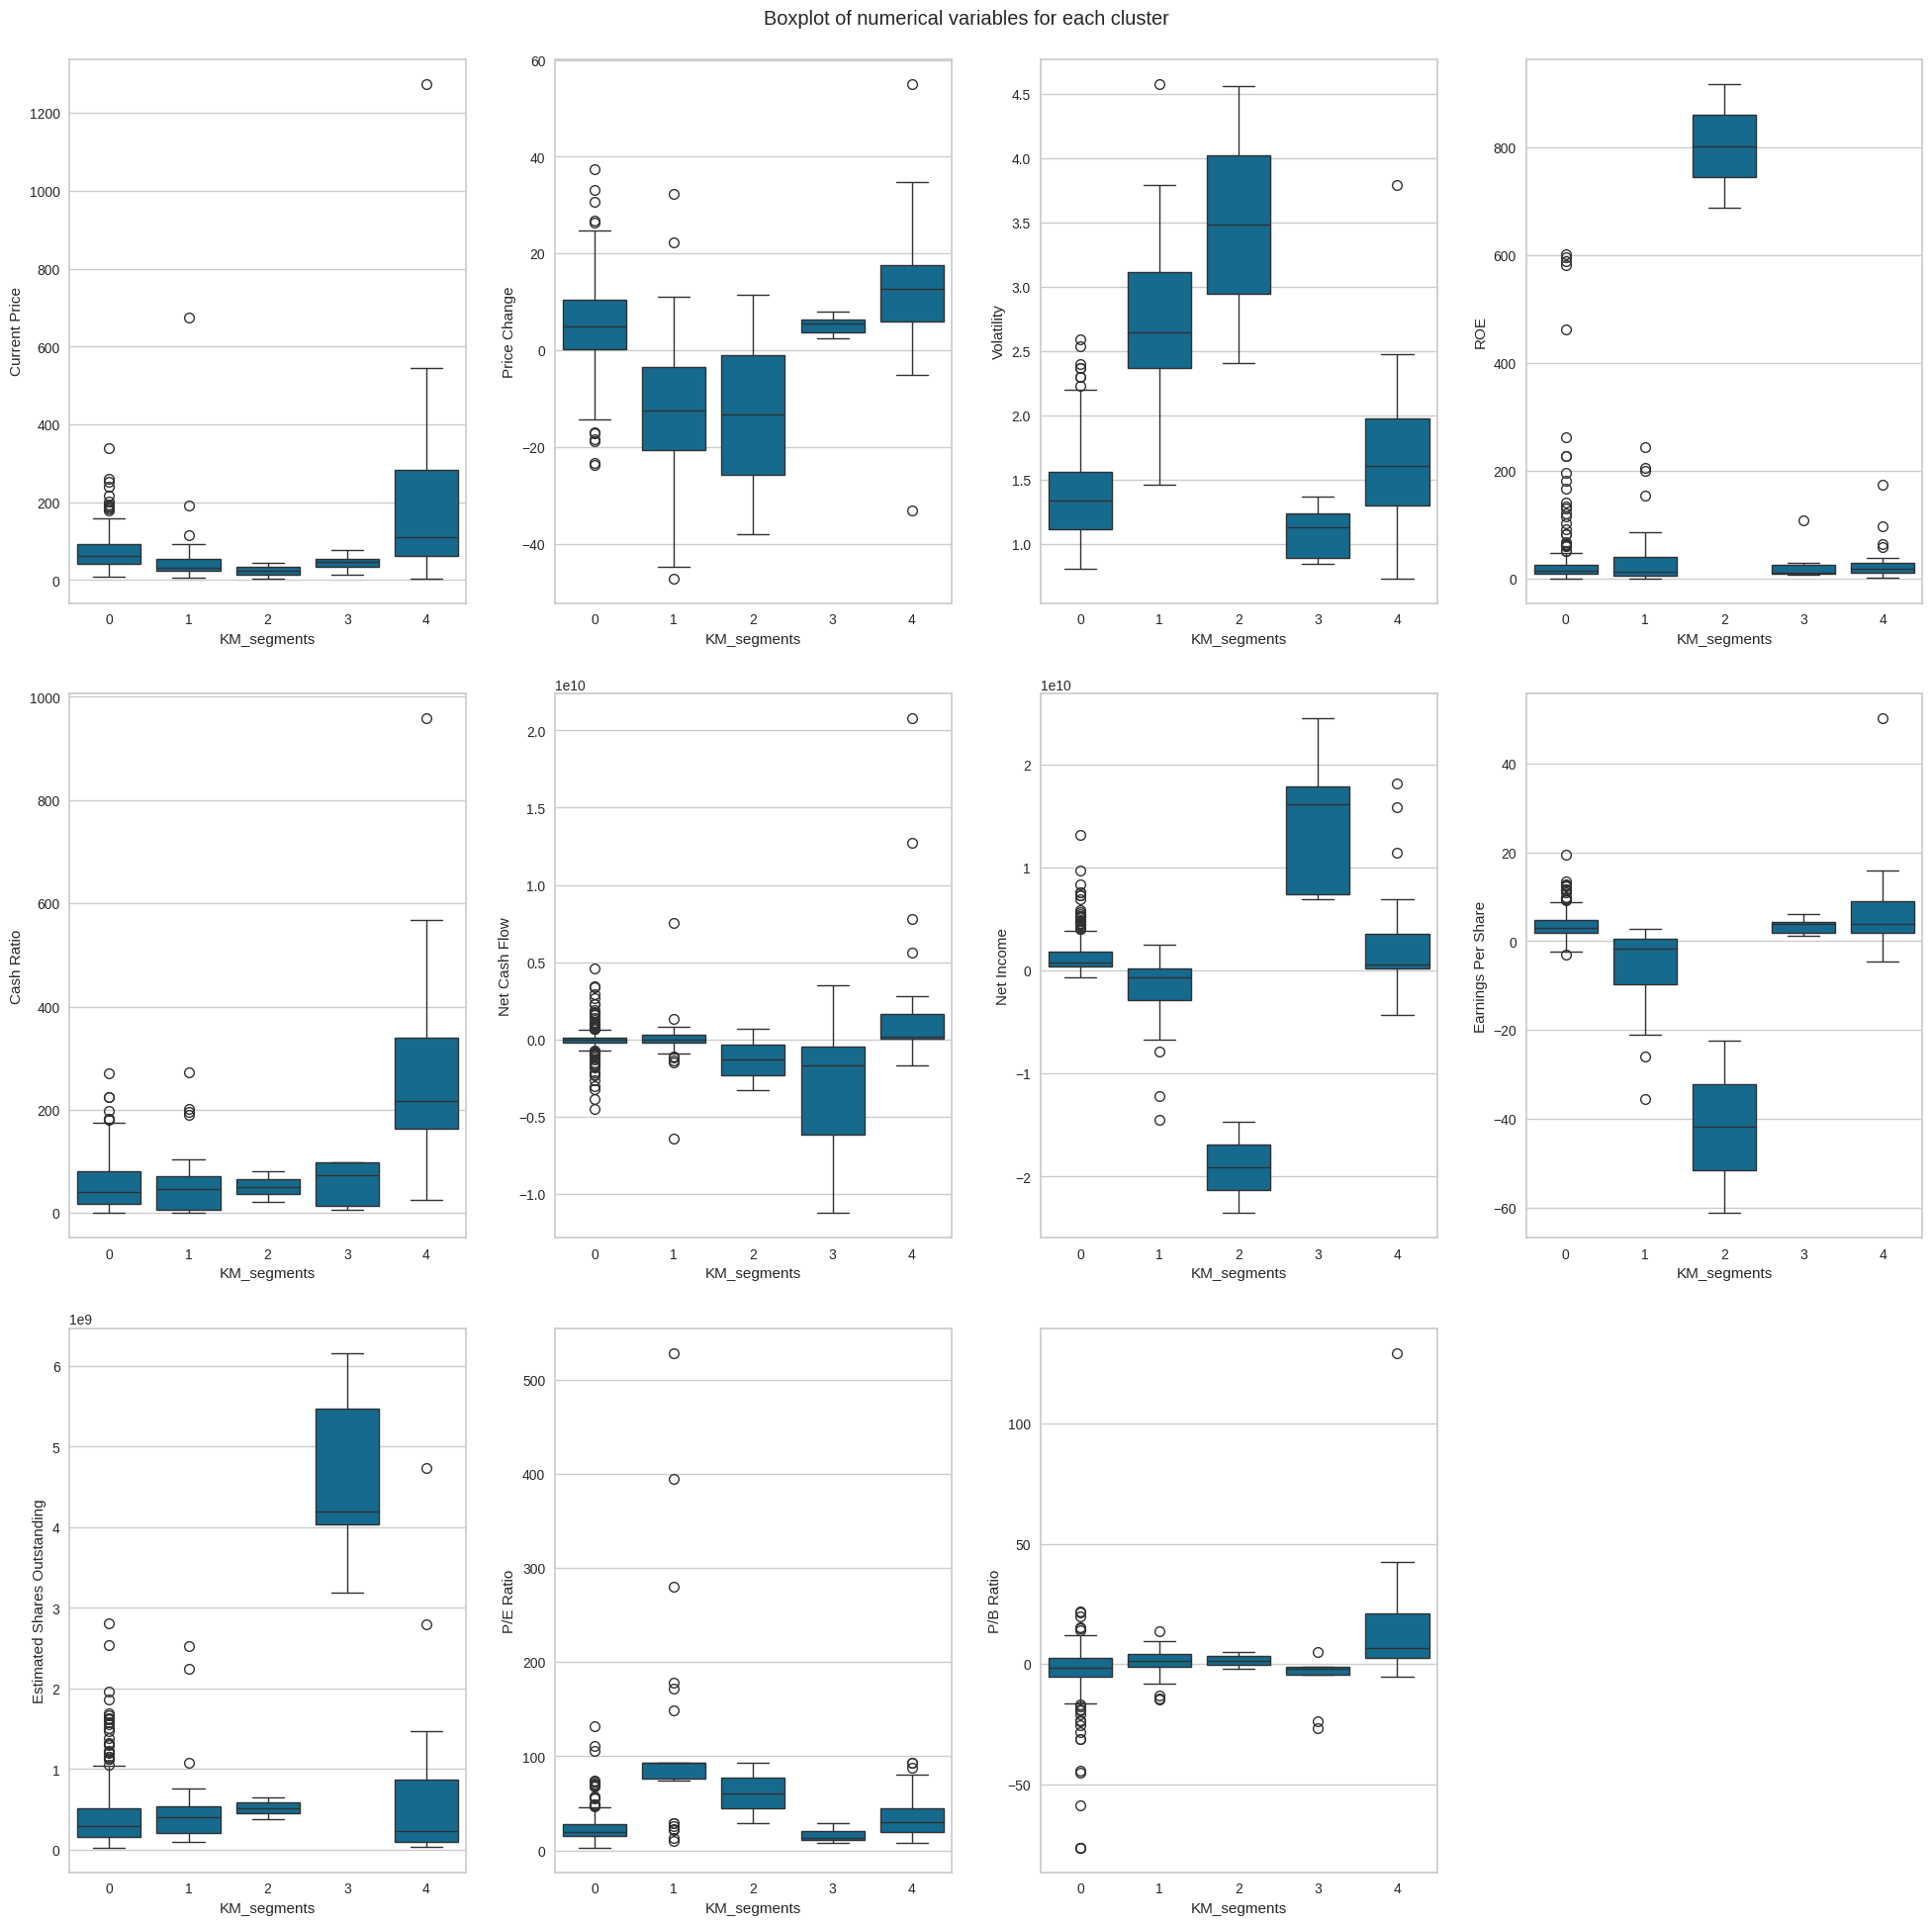

In [62]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

ACTIONABLE INSIGHTS AND RECOMMENDATIONS

investment Strategy: Utilize cluster analysis to group stocks based on their financial indicators and market performance. This can help in devising personalized investment strategies for clients, focusing on diversified portfolios that balance risk and return.

Portfolio Diversification: Emphasize the importance of diversification in investment portfolios to mitigate risk. Highlight the benefits of spreading investments across different sectors and industries to minimize exposure to market fluctuations.

Early Investment: Educate clients about the significance of starting investments early to take advantage of compounding returns over time. Encourage them to begin investing as soon as possible to maximize long-term wealth accumulation.

Risk Management: Provide insights into risk management strategies by identifying stocks with minimum correlation within clusters. Suggest allocating assets across clusters with low correlation to minimize portfolio volatility and protect against potential losses.

Continuous Monitoring: Emphasize the need for regular monitoring and adjustment of investment portfolios based on changing market conditions and performance of individual stocks. Implement a systematic review process to ensure portfolios remain aligned with clients' financial goals and risk tolerance.

Client Education: Offer educational resources and workshops to help clients understand financial metrics, investment strategies, and the rationale behind portfolio recommendations. Empowering clients with knowledge can enhance their confidence in investment decisions and foster long-term financial success.

Customized Solutions: Tailor investment recommendations based on clients' risk preferences, investment goals, and time horizon. Offer personalized solutions that align with individual financial circumstances and preferences to maximize client satisfaction and retention.

By implementing these insights and recommendations, Trade&Ahead can enhance its value proposition, strengthen client relationships, and drive positive outcomes for investors in the dynamic and competitive landscape of financial markets.